In [51]:
from ucimlrepo import fetch_ucirepo 
from implementations import bayes
from implementations import id3
from implementations import random_forest
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from typing import Tuple
import pandas as pd
import time
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [52]:
student_performance = fetch_ucirepo(id=320) 
  
X = np.array(student_performance.data.features)
y = np.array(student_performance.data.targets.G3)

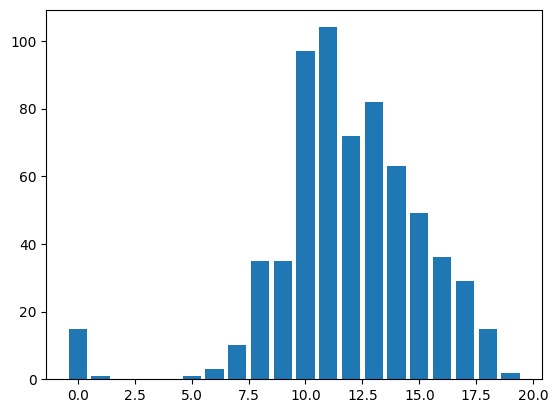

In [70]:
c = Counter()
c.update(y)
plt.bar(c.keys(), c.values())
plt.show()

In [79]:
def reassign_classes(y: np.ndarray) -> np.ndarray:
    new_y = []
    for current_class in y:
        if current_class < 10:
            new_y.append(0)
        elif 10 <= current_class < 11:
            new_y.append(1)
        elif 11 <= current_class < 13:
            new_y.append(2)
        elif 13 <= current_class < 15:
            new_y.append(3)
        elif 15 <= current_class:
            new_y.append(4) 
    return new_y

new_y = reassign_classes(y)

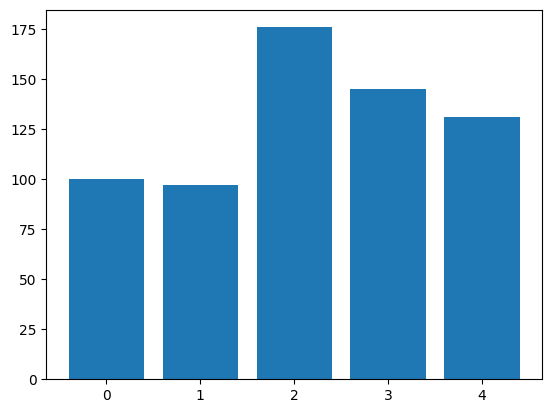

In [80]:
c2 = Counter()
c2.update(new_y)
plt.bar(c2.keys(), c2.values())
plt.show()

In [53]:
X

array([['GP', 'F', 18, ..., 1, 3, 4],
       ['GP', 'F', 17, ..., 1, 3, 2],
       ['GP', 'F', 15, ..., 3, 3, 6],
       ...,
       ['MS', 'F', 18, ..., 1, 5, 6],
       ['MS', 'M', 17, ..., 4, 2, 6],
       ['MS', 'M', 18, ..., 4, 5, 4]], dtype=object)

In [54]:
one_binary_encodig = [0, 1, 3, 4, 5, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
for_one_hot_encoding = [8, 9, 10, 11]
rest = [x for x in range(X.shape[1]) if x not in for_one_hot_encoding and x not in one_binary_encodig]

In [55]:
print(rest)

[2, 6, 7, 12, 13, 14, 26, 27, 28, 29]


In [56]:
binary_data = np.where(X[:, one_binary_encodig] == 'yes', 1, 0)

In [57]:
enc = OneHotEncoder(handle_unknown='ignore')

In [58]:
enc.fit(X[:, for_one_hot_encoding])

OneHotEncoder(handle_unknown='ignore')

In [59]:
one_hot_X = enc.transform(X[:, for_one_hot_encoding]).toarray()

In [60]:
one_hot_X

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [61]:
X = np.hstack([X[:, rest], one_hot_X, binary_data])

In [62]:
X

array([[18, 4, 4, ..., 0, 0, 0],
       [17, 1, 1, ..., 0, 0, 0],
       [15, 1, 1, ..., 0, 0, 0],
       ...,
       [18, 1, 1, ..., 0, 0, 0],
       [17, 3, 1, ..., 0, 0, 0],
       [18, 3, 2, ..., 0, 0, 0]], dtype=object)

In [86]:
Counter(new_y)

Counter({2: 176, 3: 145, 4: 131, 0: 100, 1: 97})

In [89]:
importlib.reload(random_forest)
x_train, x_test, y_train, y_test = train_test_split(X, new_y, test_size=0.1)
rfc = random_forest.RandomForestClassifier(classifiers_number=10)
rfc.train_random_forest(x_train, y_train, tree_percentage=1.0)

samples = len(y_test)
correctly_predicted = 0
y_pred = []
for sample, gt in zip(x_test, y_test):
    prediction = rfc.predict(sample)
    y_pred.append(prediction)
    print(int(prediction), gt)
    if prediction == gt:
        correctly_predicted += 1

print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")

data 584 339 245
Inside 0 17 None None
data 584 439 145
Inside 1 2 0 17
data 584 219 365
Inside 2 3 0 17
data 584 242 342
Inside 3 2 0 17
data 584 393 191
Inside 4 2 0 17
data 584 97 487
Inside 5 1 0 17
data 584 64 520
Inside 6 3 5 1
data 584 109 475
Inside 7 4 5 1
data 584 520 64
Inside 8 2 5 1
data 584 100 484
Inside 9 8 5 1
data 584 112 472
Inside 10 1.0 5 1
data 584 34 550
Inside 11 1.0 5 1
data 584 244 340
Inside 12 1.0 5 1
data 584 129 455
Inside 13 1.0 5 1
data 584 65 519
Inside 14 1.0 5 1
data 584 38 546
Inside 15 1.0 5 1
data 584 29 555
Inside 16 1.0 5 1
data 584 324 260
Inside 17 1.0 5 1
data 584 163 421
Inside 18 1.0 5 1
data 584 30 554
Inside 19 1.0 5 1
data 584 268 316
Inside 20 1.0 5 1
data 584 136 448
Inside 21 1.0 5 1
data 584 50 534
Inside 22 1.0 5 1
data 584 130 454
Inside 23 1.0 5 1
data 584 144 440
Inside 24 1.0 5 1
data 584 408 176
Inside 25 1.0 5 1
data 584 32 552
Inside 26 1.0 5 1
data 584 65 519
Inside 32 1 5 1
data 584 371 213
Inside 33 1 5 1
data 584 40 544
In

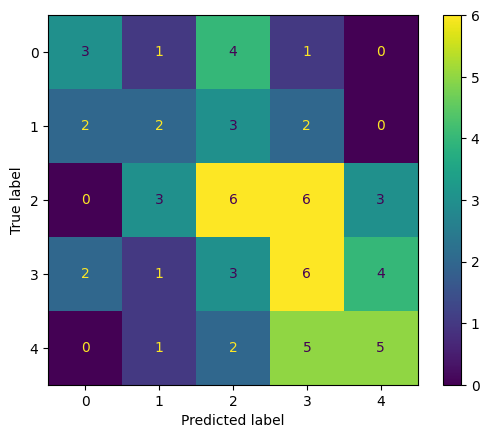

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["0", "1", "2", "3", "4"])
disp.plot()
plt.show()

In [85]:
importlib.reload(id3)
x_train, x_test, y_train, y_test = train_test_split(X, new_y, test_size=0.1)
dc = id3.DecisionTreeClassifier(2)
dc.fit(x_train, y_train)

samples = len(y_test)
correctly_predicted = 0
for sample, gt in zip(x_test, y_test):
    prediction = dc.predict(sample)
    print(int(prediction), gt)
    if prediction == gt:
        correctly_predicted += 1

print(f"Accuracy: {(correctly_predicted/samples)*100:.2f}%")

data 584 322 262
Inside 0 17 None None
data 584 159 425
Inside 1 4 0 17
data 584 234 350
Inside 2 3 1 4
data 584 251 333
Inside 3 2 1 4
data 584 392 192
Inside 4 2 1 4
data 584 92 492
Inside 5 1 1 4
data 584 178 406
Inside 6 2 5 1
data 584 116 468
Inside 7 4 5 1
data 584 505 79
Inside 8 2 5 1
data 584 105 479
Inside 9 8 5 1
data 584 117 467
Inside 10 1.0 5 1
data 584 44 540
Inside 11 1.0 5 1
data 584 234 350
Inside 12 1.0 5 1
data 584 124 460
Inside 13 1.0 5 1
data 584 65 519
Inside 14 1.0 5 1
data 584 38 546
Inside 15 1.0 5 1
data 584 20 564
Inside 16 1.0 5 1
data 584 331 253
Inside 17 1.0 5 1
data 584 162 422
Inside 18 1.0 5 1
data 584 33 551
Inside 19 1.0 5 1
data 584 257 327
Inside 20 1.0 5 1
data 584 138 446
Inside 21 1.0 5 1
data 584 60 524
Inside 22 1.0 5 1
data 584 129 455
Inside 23 1.0 5 1
data 584 137 447
Inside 24 1.0 5 1
data 584 410 174
Inside 25 1.0 5 1
data 584 37 547
Inside 26 1.0 5 1
data 584 61 523
Inside 32 1 5 1
data 584 356 228
Inside 33 1 5 1
data 584 36 548
Insid